In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Fraud_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

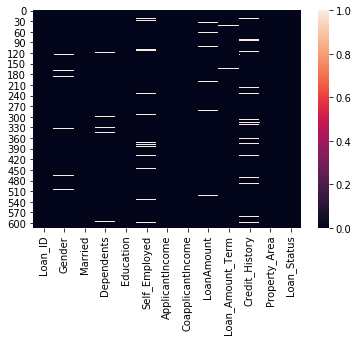

In [7]:
sns.heatmap(data.isnull())

In [8]:
col=["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
col=["Dependents","LoanAmount","Loan_Amount_Term","Credit_History"]
data[col]=data[col].fillna(data.mode().iloc[0])

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
    if data[col].dtype=='object':
        if len(list(data[col].unique()))<=50:
            le.fit(data[col])
            data[col]=le.transform(data[col])
            le_count+=1
print('{} columns are label encoded.', format(le_count))    

{} columns are label encoded. 6


In [13]:
data=data.drop("Loan_ID",axis=1)

In [14]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data.rename(columns={'Loan_ID':'Loanid', 'Gender':'Gender', 'Married':'married', 'Dependents':'dependents', 'Education':'eductaion',
       'Self_Employed':'selfemployed', 'ApplicantIncome':'applicantincome', 'CoapplicantIncome':'coapplicatincome', 'LoanAmount':'loanamount',
       'Loan_Amount_Term':'loanamountterm', 'Credit_History':'credithistory', 'Property_Area':'propertyarea', 'Loan_Status':'loanstatus'},inplace=True)

In [16]:
data.head()

,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
data.corr()

,Gender,married,dependents,eductaion,selfemployed,applicantincome,coapplicatincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
eductaion,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
selfemployed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
applicantincome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
coapplicatincome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
loanamount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
loanamountterm,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
credithistory,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


In [18]:
#Using MinMaxScaler to shrinks the range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [19]:
df=pd.DataFrame(data)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
5,1.0,1.0,0.666667,0.0,1.0,0.065145,0.100703,0.373372,0.743590,1.0,1.0,1.0
6,1.0,1.0,0.000000,1.0,0.0,0.027001,0.036384,0.124457,0.743590,1.0,1.0,1.0
7,1.0,1.0,1.000000,0.0,0.0,0.035696,0.060096,0.215630,0.743590,0.0,0.5,0.0
8,1.0,1.0,0.666667,0.0,0.0,0.047693,0.036624,0.230101,0.743590,1.0,1.0,1.0
9,1.0,1.0,0.333333,0.0,0.0,0.156970,0.263230,0.492041,0.743590,1.0,0.5,0.0


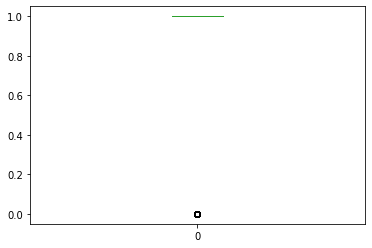

In [20]:
df[0].plot.box()

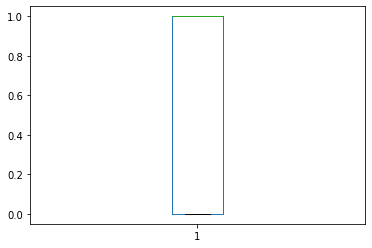

In [21]:
df[1].plot.box()

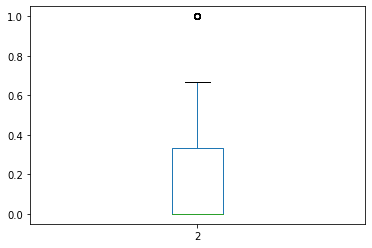

In [22]:
df[2].plot.box()

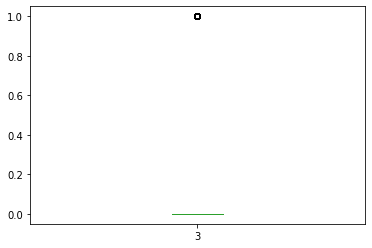

In [23]:
df[3].plot.box()

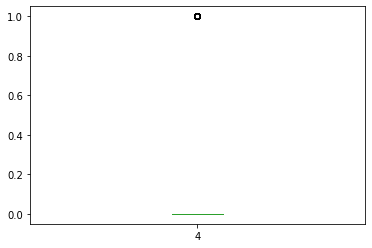

In [24]:
df[4].plot.box()

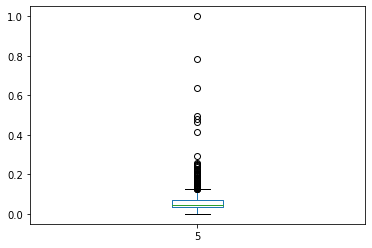

In [25]:
df[5].plot.box()

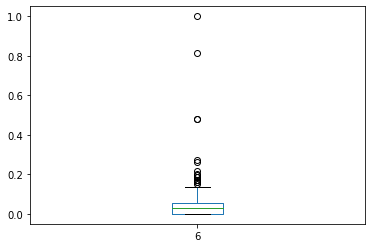

In [26]:
df[6].plot.box()

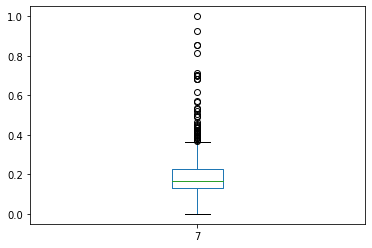

In [27]:
df[7].plot.box()

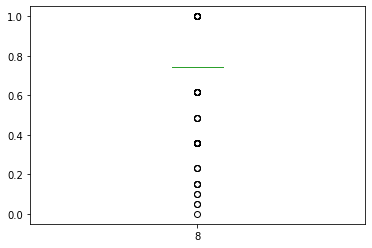

In [28]:
df[8].plot.box()

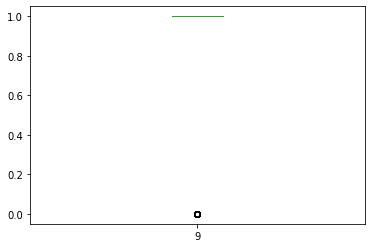

In [29]:
df[9].plot.box()

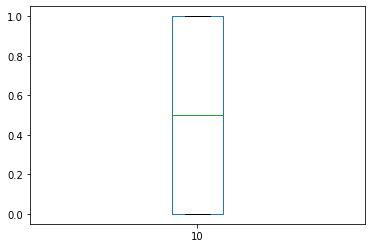

In [30]:
df[10].plot.box()

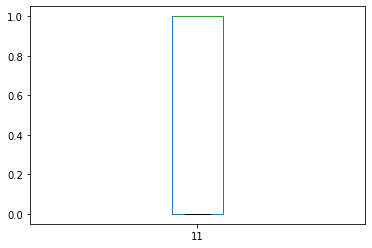

In [31]:
df[11].plot.box()

In [32]:
from scipy.stats import zscore
import numpy as np

In [33]:
z=np.abs(zscore(data))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [34]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [36]:
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [37]:
x=df_new.drop(11,axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)


In [39]:
x.skew()

0    -1.622920
1    -0.630211
2     1.052106
3     1.306588
4     2.252848
5     2.148522
6     1.350517
7     1.163426
8    -2.098806
9    -1.976043
10   -0.055332
dtype: float64

In [40]:
import numpy as np 
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [41]:
x.skew()

0    -1.622920
1    -0.630211
2     0.859364
3     1.306588
4     2.252848
5     1.716423
6     0.931924
7     0.747824
8    -2.098806
9    -1.976043
10   -0.055332
dtype: float64

In [42]:
y=df_new[11]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: 11, dtype: float64

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=12)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 11)
(122, 11)
(455,)
(122,)


In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [47]:

# Test Options and Evaluation Metrics
num_folds = 10
scoring="accuracy"
# Spot Check Algorithms
models = []
models.append(('lg', LogisticRegression()))
models.append(('mnb', MultinomialNB()))
models.append(('svc', SVC()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('knn', KNeighborsClassifier()))
models.append(('rfc', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=0)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lg: 0.795459 (0.062445)
mnb: 0.672657 (0.065861)
svc: 0.795459 (0.062445)
dtc: 0.676812 (0.087457)
knn: 0.775700 (0.055922)
rfc: 0.749275 (0.054676)


In [48]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9016393442622951
[[18 11]
 [ 1 92]]
              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75        29
         1.0       0.89      0.99      0.94        93

    accuracy                           0.90       122
   macro avg       0.92      0.80      0.84       122
weighted avg       0.91      0.90      0.89       122



In [49]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9016393442622951
[[18 11]
 [ 1 92]]
              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75        29
         1.0       0.89      0.99      0.94        93

    accuracy                           0.90       122
   macro avg       0.92      0.80      0.84       122
weighted avg       0.91      0.90      0.89       122



In [50]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8688524590163934
[[18 11]
 [ 5 88]]
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        29
         1.0       0.89      0.95      0.92        93

    accuracy                           0.87       122
   macro avg       0.84      0.78      0.80       122
weighted avg       0.86      0.87      0.86       122



In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
#pipeline with preprocessing and model
pipeline=make_pipeline(preprocessing.MinMaxScaler(),RandomForestClassifier(n_estimators=100))

In [56]:
#Appling Hyperparameters
pipeline.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                          max_depth=None, max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_jobs=None, oob_score=False, random_state=None,
                          verbose=0, warm_start=False))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                   

In [57]:
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestclassifier__max_depth': [None, 5, 3, 1]}

In [58]:
clf=GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                            

In [59]:
print(clf.best_params_)

{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'auto'}


In [60]:
print(clf.refit)

True


In [61]:
#pedicting the data
y_pred=clf.predict(x_test)

In [62]:
print(accuracy_score(y_test,y_pred))

0.9016393442622951


In [63]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(clf,'Project_19.pkl')

['Project_19.pkl']